###Muhammad Hanan Asghar

#Libraries

In [ ]:
!pip uninstall opencv-python
!pip install opencv-python

! pip install --upgrade albumentations

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.5 MB 1.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 11.2 MB/s 
     |████████████████████████████████| 47.8 MB 53 kB/s 
  Attempting uninstall: albumentations
    Found exis

In [ ]:
!unzip *.zip

Archive:  data.zip
   creating: data/
   creating: data/.ipynb_checkpoints/
   creating: data/nonsmile/
  inflating: data/nonsmile/Edward_Flynn_0001.jpg  
  inflating: data/nonsmile/Anastasia_Kelesidou_0001.jpg  
  inflating: data/nonsmile/Carlos_Paternina_0001.jpg  
  inflating: data/nonsmile/Anne_ONeil_0001.jpg  
  inflating: data/nonsmile/Gilberto_Simoni_0001.jpg  
  inflating: data/nonsmile/Habib_Hisham_0001.jpg  
  inflating: data/nonsmile/Erick_Barkley_0001.jpg  
  inflating: data/nonsmile/Alan_Greenspan_0001.jpg  
  inflating: data/nonsmile/Charles_Richardson_0001.jpg  
  inflating: data/nonsmile/Aicha_El_Ouafi_0001.jpg  
  inflating: data/nonsmile/Darcy_Regier_0001.jpg  
  inflating: data/nonsmile/Frank_Stallone_0001.jpg  
  inflating: data/nonsmile/Christian_Bale_0001.jpg  
  inflating: data/nonsmile/David_Ho_0001.jpg  
  inflating: data/nonsmile/Bill_McBride_0009.jpg  
  inflating: data/nonsmile/Fernando_Leon_de_Aranoa_0001.jpg  
  inflating: data/nonsmile/Conan_OBrien_0004.j

In [ ]:
!unzip *.zip && rm -rf *.zip

Archive:  ImageDataAugmentor-master.zip
c3f6fdd04c04652b1ef333d554475a644f05c7f7
   creating: ImageDataAugmentor-master/
 extracting: ImageDataAugmentor-master/.gitignore  
  inflating: ImageDataAugmentor-master/CHANGELOG.md  
   creating: ImageDataAugmentor-master/ImageDataAugmentor/
  inflating: ImageDataAugmentor-master/ImageDataAugmentor/__init__.py  
  inflating: ImageDataAugmentor-master/ImageDataAugmentor/dataframe_iterator.py  
  inflating: ImageDataAugmentor-master/ImageDataAugmentor/directory_iterator.py  
  inflating: ImageDataAugmentor-master/ImageDataAugmentor/image_data_augmentor.py  
  inflating: ImageDataAugmentor-master/ImageDataAugmentor/iterator.py  
  inflating: ImageDataAugmentor-master/ImageDataAugmentor/numpy_array_iterator.py  
  inflating: ImageDataAugmentor-master/ImageDataAugmentor/utils.py  
  inflating: ImageDataAugmentor-master/LICENSE  
  inflating: ImageDataAugmentor-master/README.md  
   creating: ImageDataAugmentor-master/examples/
  inflating: ImageDa

In [ ]:
import os
import cv2
import time
import uuid
import json
import numpy as np
import tensorflow as tf
import albumentations as alb
from functools import partial
from matplotlib import pyplot as plt
from ImageDataAugmentor.image_data_augmentor import *

#Keras ImageDataGenerator with Albumenations

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
AUGMENTATIONS = alb.Compose([
    alb.Transpose(p=0.5),
    alb.Flip(p=0.5),
    alb.OneOf([
        alb.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3),
        alb.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1)
    ],p=1),
    alb.GaussianBlur(p=0.05),
    alb.HueSaturationValue(p=0.5),
    alb.RGBShift(p=0.5),
])

In [ ]:
!rm -rf '/content/data/.ipynb_checkpoints'

In [ ]:
# dataloaders
datagen = ImageDataAugmentor(
        rescale=1./255,
        augment=AUGMENTATIONS,
        preprocess_input=None,
        validation_split=0.15)

train_generator = datagen.flow_from_directory(
        'data',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        subset="training")

test_generator = datagen.flow_from_directory(
        'data',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        subset="validation")

Found 1024 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


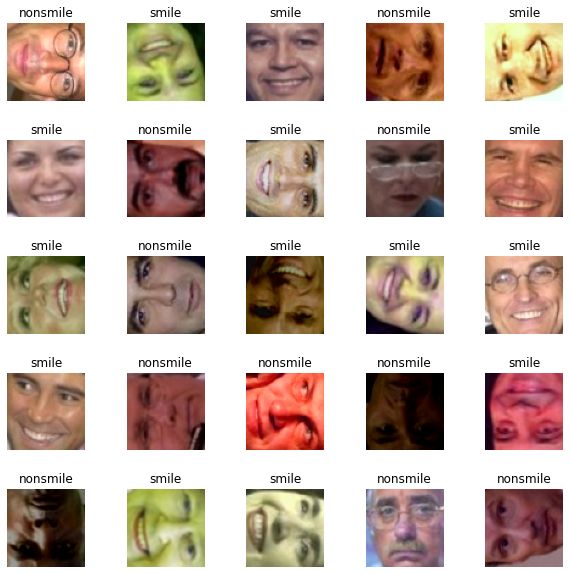

In [ ]:
train_generator.show_data()

#Model

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [ ]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("model.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose = 1)

earlystop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

callbacks = [earlystop, checkpoint]

In [ ]:
history = model.fit(
    train_generator, 
    validation_data=test_generator, 
    epochs=100, 
    callbacks=callbacks
)

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.4883
Epoch 1: val_loss improved from inf to 0.69035, saving model to model.h5
32/32 [==============================] - 5s 51ms/step - loss: 0.6979 - accuracy: 0.4883 - val_loss: 0.6903 - val_accuracy: 0.5111
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.6577 - accuracy: 0.6016
Epoch 2: val_loss improved from 0.69035 to 0.67485, saving model to model.h5
32/32 [==============================] - 1s 45ms/step - loss: 0.6577 - accuracy: 0.6016 - val_loss: 0.6748 - val_accuracy: 0.5444
Epoch 3/100
31/32 [============================>.] - ETA: 0s - loss: 0.6021 - accuracy: 0.6804
Epoch 3: val_loss improved from 0.67485 to 0.50628, saving model to model.h5
32/32 [==============================] - 1s 40ms/step - loss: 0.5986 - accuracy: 0.6816 - val_loss: 0.5063 - val_accuracy: 0.7778
Epoch 4/100
31/32 [============================>.] - ETA: 0s - loss: 0.4512 - accuracy: 0.8105
Epo

In [ ]:
model.evaluate(test_generator)

6/6 [==============================] - 0s 28ms/step - loss: 0.1475 - accuracy: 0.9500


[0.14749954640865326, 0.949999988079071]

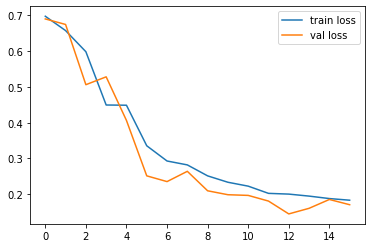

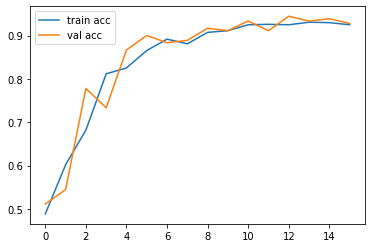

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/model.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("joy_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp44metbif/assets


10868852